In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/nCoV_data_enumerated.csv'
data = pd.read_csv(path)

# Check data
data.head(20)

,Number,Date,Total_cases\t
0,1,1/28/2020,6061
1,2,1/29/2020,7816
2,3,1/30/2020,9821
3,4,1/31/2020,11948
4,5,2/01/2020,14551
5,6,2/02/2020,17387
6,7,2/03/2020,20626
7,8,2/04/2020,24553
8,9,2/05/2020,28276
9,10,2/06/2020,31439


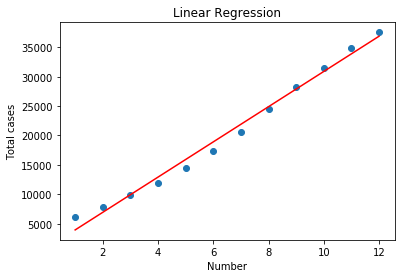

Root mean squared error score: 1.0829995188136434e-07
R^2 score: 0.9891358160698311


In [3]:
from sklearn.linear_model import LinearRegression

# Linear Regression
model = LinearRegression()
X = data.iloc[:, 0:1].values
y = data.iloc[:, 2:3].values
model.fit(X, y)
y_pred = model.predict(X)

# Graphing
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("Number")
plt.ylabel("Total cases")
plt.show()

# Score
rmse = sqrt(mse(y, y_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y, y_pred)
print("R^2 score: " + str(r2))

In [4]:
X_train = data.iloc[:13, 0:1].values
X_test = data.iloc[13:, 0:1].values

y_train = data.iloc[:13, 2:3].values
y_test = data.iloc[13:, 2:3].values

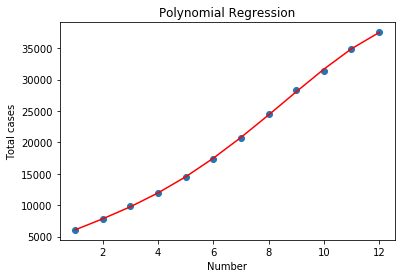

Root mean squared error score: 1.217046151077001e-08
R^2 score: 0.9998627998213961


In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
features = PolynomialFeatures(degree=4)
X_poly = features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_poly_pred = model.predict(X_poly)

# Graphing 
plt.scatter(X, y)
plt.plot(X, y_poly_pred, color='red')
plt.title("Polynomial Regression")
plt.xlabel("Number")
plt.ylabel("Total cases")
plt.show()

# Score
rmse = sqrt(mse(y,y_poly_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y,y_poly_pred)
print("R^2 score: " + str(r2))

In [7]:
# Predicting with Polynomial Regression
model.predict(features.fit_transform([[12]])) # Param: X

array([[37502.55128205]])